<a href="https://colab.research.google.com/github/kaajulo/ML_regresja/blob/main/regresja_zadanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import pakietów

In [ ]:
# zaimportuj pandas
# zaimportuj pakiety do wizualizacji danych np matplotlib, seaborn
# z pakietu sklearn zaimportuj funkcję do podziału danych na zbiór treningowy i testowy, 
# algorytm regrefji liniowej, algorytm drzewa decyzyjnego, metrykę r2 oraz MSE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Wstępne zapoznanie się ze zbiorem danych

In [ ]:
# wgraj zbiór danych kc_house_data.csv

In [3]:
kc_house=pd.read_csv('kc_house_data.csv')

In [ ]:
# wyświetl kilka pierwszych wierszy zbioru

In [4]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# wyświetl informacje o zbiorze danych

In [5]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Columns definition:
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was 0 = No view, 1 = Fair 2 = Average, 3 = Good, 4 = Excellent
* condition - An index from 1 to 5 on the condition of the apartment,1 = Poor- Worn out, 2 = Fair- Badly worn, 3 = Average, 4 = Good, 5= Very Good
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
# wyświetl statystyki

In [6]:
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Przetwarzanie danych

In [ ]:
# Ten krok ma na celu lepsze zapoznanie się ze zbiorem danych, usunięcie błędów, braków danych itp.

In [ ]:
# sprawdz rozkład zmiennej 'price' 

<ipython-input-9-a621f1edef60>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kc_house['price'])


<Axes: xlabel='price', ylabel='Density'>

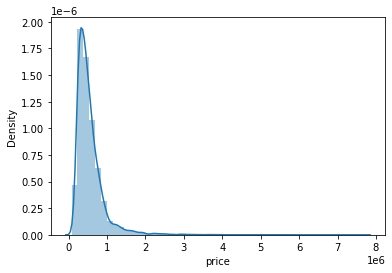

In [9]:
sns.distplot(kc_house['price'])

In [ ]:
# sprawdź, ile sypialni mają budynki

In [11]:
set(kc_house['bedrooms'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}

In [ ]:
# usuń domy z odstającą liczbą sypialni

<ipython-input-12-5654c4a58f10>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kc_house['bedrooms'])


<Axes: xlabel='bedrooms', ylabel='Density'>

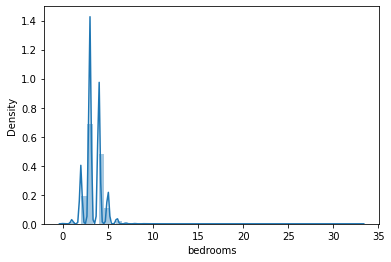

In [12]:
sns.distplot(kc_house['bedrooms'])

In [13]:
upper=kc_house['bedrooms'].mean()+kc_house['bedrooms'].std()*3
lower=kc_house['bedrooms'].mean()-kc_house['bedrooms'].std()*3

In [23]:
kc_house2=kc_house[(kc_house['bedrooms']<upper) & (kc_house['bedrooms']>lower)]

In [15]:
set(kc_house2['bedrooms'])

{1, 2, 3, 4, 5, 6}

<ipython-input-16-6a5b454067ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kc_house2['bedrooms'])


<Axes: xlabel='bedrooms', ylabel='Density'>

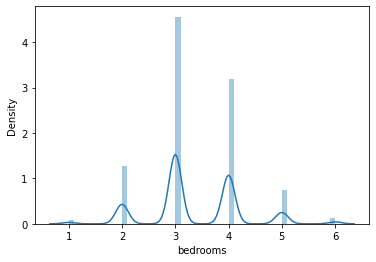

In [16]:
sns.distplot(kc_house2['bedrooms'])

In [ ]:
# sprawdź liczbę łazienek w budynkach

In [24]:
set(kc_house2['bathrooms'])

{0.0,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.75,
 8.0}

In [20]:
import numpy as np

korelacja cena a ilosc lazienek

<Axes: >

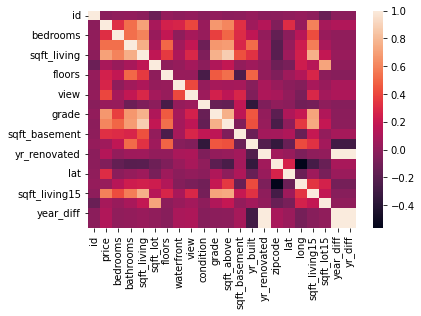

In [84]:
count_corr=kc_house2.corr() #liczenie korelacji

sns.heatmap(count_corr) #rysowanie mapy

In [ ]:
# popraw zmienną 'bathrooms' jeżeli uważasz, że jest to potrzebne

In [ ]:
# sprawdź, czy rok renowacji budynku był zawsze późniejszy niż rok budowy domu

In [38]:
kc_house2['yr_diff']=kc_house2['yr_renovated'] - kc_house2['yr_built']

<ipython-input-38-dae898446992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_house2['yr_diff']=kc_house2['yr_renovated'] - kc_house2['yr_built']


In [39]:
kc_house2[['yr_built', 'yr_renovated', 'yr_diff']].head()

,yr_built,yr_renovated,yr_diff
0,1955,0,-1955
1,1951,1991,40
2,1933,0,-1933
3,1965,0,-1965
4,1987,0,-1987


In [45]:
year_check=kc_house2.query('yr_renovated!=0')

In [46]:
year_check.sort_values('yr_diff')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_diff,yr_diff
9563,3023039231,20140714T000000,650000.0,1,1.00,920,91476,1.5,0,0,...,0,1996,2002,98070,47.4480,-122.472,1746,91476,6,6
18185,1980200384,20141022T000000,825000.0,4,3.50,3620,6499,2.5,0,0,...,0,2003,2009,98177,47.7326,-122.360,2330,7200,6,6
4088,7230000265,20140617T000000,499500.0,3,2.50,2970,21907,2.0,0,0,...,0,1998,2006,98059,47.4741,-122.099,2040,27917,8,8
17492,1615900020,20150320T000000,325000.0,6,2.00,2780,13950,2.5,0,0,...,0,1955,1964,98030,47.3738,-122.226,2120,13950,9,9
19417,3163600076,20140730T000000,152275.0,1,1.00,1020,6871,1.0,0,0,...,0,1937,1946,98146,47.5051,-122.338,1260,6933,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,7132300695,20150421T000000,435000.0,3,1.50,1300,3348,1.5,0,0,...,0,1904,2014,98144,47.5920,-122.307,1590,2577,110,110
6671,475001235,20140808T000000,870000.0,5,4.00,3400,5000,2.0,0,0,...,1080,1900,2013,98107,47.6655,-122.363,1910,5000,113,113
15046,9187200275,20150420T000000,905000.0,4,2.25,2240,5000,2.0,0,0,...,470,1900,2014,98122,47.6027,-122.295,2120,5000,114,114
2566,3037200060,20140926T000000,499000.0,3,2.50,1750,2150,2.5,0,0,...,520,1900,2014,98122,47.6037,-122.311,1410,3300,114,114


In [ ]:
# sprawdź rozkład cen domów w zależności od ich kondycji

wykres pudełkowy

In [ ]:
# porównaj rok budowy domu z jego kondycją

In [ ]:
# sprawdź korelację między zmiennymi

In [ ]:
# po wstępnym zapoznaniu się ze zbiorem danych zdefiniuj zmienne potrzebne do stworzenia modelu, zdefiniuj zmienną zelażną(target) oraz zmienne niezależna

# Modele predykcyjne

In [ ]:
# zdefinuj zmienne X

In [61]:
X=kc_house2[['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode',	'lat',	'long',	'sqft_living15']]

In [ ]:
# zdefiniuj zmienną y

In [50]:
y=kc_house2['price']

In [ ]:
# podziel dane na zbiór treningowy i testowy

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=123)

## Regresja liniowa

In [ ]:
# wytrenuj model regresji liniowej na zbiorze treningowym

In [63]:
model_lin=LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [ ]:
# zrób predykcje na zbiorze testowym

In [64]:
y_lin_test=model_lin.predict(X_test)

In [ ]:
# oblicz współczynnik r2

In [65]:
r2_score(y_test, y_lin_test)

0.7143786955888061

In [ ]:
# oblicz metrykę MSE

In [69]:
mean_squared_error(y_test, y_lin_test)

33822638441.899403

In [ ]:
# wyświetl współczynniki dla zmiennych

In [73]:
model_lin.intercept_

4759613.727115491

In [ ]:
# wyświetl współczynnik dla wyrazu wolnego

In [74]:
model_lin.coef_

array([-4.10140775e+04,  4.42380106e+04,  1.14227484e+02, -5.71000403e-02,
        3.47951900e+03,  6.25222661e+05,  4.98982477e+04,  2.66944866e+04,
        9.54727179e+04,  7.47685875e+01,  3.94588969e+01, -2.60528181e+03,
        1.79383405e+01, -5.77299959e+02,  6.09846790e+05, -2.23516203e+05,
        1.68518912e+01])

### Drzewo decyzyjne

In [ ]:
# wytrenuj model regresji liniowej na zbiorze treningowym

In [75]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# zrób predykcje na zbiorze testowym

In [76]:
y_pred_dt=dt.predict(X_test)

In [ ]:
# oblicz współczynnik r2

In [77]:
r2_score(y_test, y_pred_dt)

0.7447277673970827

In [ ]:
# oblicz metrykę MSE

In [78]:
mean_squared_error(y_test, y_pred_dt)

30228768982.705257

In [ ]:
# narysuj model drzewa

In [82]:
from sklearn import tree

In [83]:
fig, ax=plt.subplots(figsize=(12, 10))
ax=tree.plot_tree(dt)
plt.show()

KeyboardInterrupt: ignored

# Porównanie modeli

In [ ]:
# który model wyszedł lepszy?

In [1]:
git remote add origin https://github.com/kaajulo/ML_regresja.git
git branch -M main
git push -u origin main

SyntaxError: ignored